# Running Elegant with XOPT + Archiving

In [1]:
#%load_ext autoreload
#%autoreload 2
import sys
import os
lume_path = ''
sys.path.append(lume_path + 'openPMD-beamphysics')
sys.path.append(lume_path + 'distgen')
sys.path.append(lume_path + 'xopt')
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

In [2]:
# Import the class
from xopt import Xopt

### Make YAML and Run with Random Inputs

In [3]:
# Make a proper input file. 
YAML="""
xopt: {output_path: output , verbose: true, algorithm: cnsga}

algorithm:
  name: cnsga
  options: {max_generations: 3, population_size: 16, crossover_probability: 0.9, mutation_probability: 1.0,
  selection: auto, verbose: true, population: null}
  
simulation: 
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant  
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
#    L2_10_50_phase: [30, 70]
    L2_10_25_phase: [30, 60]
#    X_MAX: [0.5e-3, 3.0e-3]
#    DX: [0.9e-3, 1.1e-3]
#    DP: [10.0e-5, 18.0e-5]
  objectives:
    sigma_pz: MINIMIZE
    norm_emit_x: MINIMIZE
#    sigma_t: MINIMIZE
#    ptp_t: MINIMIZE
#    core_pz: MINIMIZE
#    core_current: MAXIMIZE
  constraints:
 #   sigma_pz: [LESS_THAN, 4.0e+6]
    norm_emit_x: [LESS_THAN, 0.6e-6]
    ptp_t: [LESS_THAN, 6.0e-14]
  #  sigma_t: [LESS_THAN, 3.0e-15]
  #  mean_pz: [GREATER_THAN, 6.0e+9]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_10_25_phase}
  constants: 
#    L1_9_25_phase: 65.108
#    L2_10_25_phase: 57.0
    L3_10_25_volt: 1.6628471874e+7
    L3_10_50_volt: 1.6628471874e+7
    X_MAX: 5.0e-3
    DX: 1.1e-3
    DP: 16.0e-5
    INPUT_FILE: /global/u2/a/aedelen/elegant_example/elegant_particles.txt
    sample_interval: 1000
    ele_fname: LCLS2cuH.ele
    lte_fname: LCLS2cuH.lte
    ELEGANT_BIN: /global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/oag/apps/bin/linux-x86_64/elegant
    HDF5_BIN: /global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/epics/extensions/bin/linux-x86_64/sdds2hdf
    path_search: /global/homes/a/aedelen/GitHub/lcls-lattice/elegant, /global/homes/a/aedelen/GitHub/lcls-lattice/elegant/rmat,/global/homes/a/aedelen/GitHub/lcls-lattice/elegant/wakefields,/global/homes/a/aedelen/GitHub/lcls-lattice/elegant/beams
    finput_name: HXRSTART.out
    foutput_name: HXRSTART.h5
    H5_SAVE: ./output/beams/  #Note need to make this directory if does not already exist
  #  timeout: 180
    

"""



In [4]:
!pwd

/global/cscratch1/sd/aedelen/test


In [5]:
X = Xopt(YAML)

Loading config as text


In [6]:
X


            Xopt 
________________________________           
Version: 0.4.1
Configured: True
Config as YAML:
xopt: {output_path: /global/cscratch1/sd/aedelen/test/output, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  function: xopt.cnsga.cnsga
  options: {max_generations: 3, population_size: 16, crossover_probability: 0.9, mutation_probability: 1.0,
    selection: auto, verbose: true, population: null, seed: null}
simulation:
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant
  options: {a: 1}
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
    L2_10_25_phase: [30, 60]
  objectives: {sigma_pz: MINIMIZE, norm_emit_x: MINIMIZE}
  constraints:
    norm_emit_x: [LESS_THAN, 6.0e-07]
    ptp_t: [LESS_THAN, 6.0e-14]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_10_2

## Do one run with random inputs

In [7]:
X.random_evaluate()

{'sigma_pz': 28226192.442028433,
 'norm_emit_x': 3.2378254857797592e-06,
 'sigma_t': 1.0135444701398148e-14,
 'mean_pz': 5756908590.604289,
 'charge': 1.242e-10,
 'ptp_t': 6.011518102836668e-14,
 'core_norm_emit_x': 8.689549219757582e-07,
 'core_pz': 13613697.10913778,
 'core_current': 6252.001185744186,
 'archive': './output/beams/elegant_sim_90c12d60bc362cecdbd643d65bdc5f47.h5'}

In [8]:
X


            Xopt 
________________________________           
Version: 0.4.1
Configured: True
Config as YAML:
xopt: {output_path: /global/cscratch1/sd/aedelen/test/output, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  function: xopt.cnsga.cnsga
  options: {max_generations: 3, population_size: 16, crossover_probability: 0.9, mutation_probability: 1.0,
    selection: auto, verbose: true, population: null, seed: null}
simulation:
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant
  options: {a: 1}
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
    L2_10_25_phase: [30, 60]
  objectives: {sigma_pz: MINIMIZE, norm_emit_x: MINIMIZE}
  constraints:
    norm_emit_x: [LESS_THAN, 6.0e-07]
    ptp_t: [LESS_THAN, 6.0e-14]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_10_2

## Run GA

In [9]:
# Pick one of these
#from concurrent.futures import ThreadPoolExecutor as PoolExecutor
from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [10]:
# Change max generations
X.algorithm['options']['max_generations'] = 3
X.run(executor=executor)

Starting at time 2020-11-11T17:13:36-08:00



 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continuous Non-dominated Sorting Genetic Algorithm
Version 0.4.1

Creating toolbox from vocs.
Created toolbox with 5 variables, 3 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'DP': 0.00016,
               'DX': 0.0011,
               'ELEGANT_BIN': '/global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/oag/apps/bin/linux-x86_64/elegant',
               'H5_SAVE': './output/beams/',
               'HDF5_BIN': '/global/cfs/cdirs/m

In [17]:
#settings = {'L1_10_25_phase': 48.10988000636041,
#'L1_9_25_phase': 7.722087823054991,
#'L1_9_50_phase': -34.63546794399416,
#'L2_10_50_phase': -49.99535063902283,
#'X1_Xband_phase': 97.87343465656124,
#'L2_10_25_phase': 55.5}

In [18]:
#X.evaluate(settings)

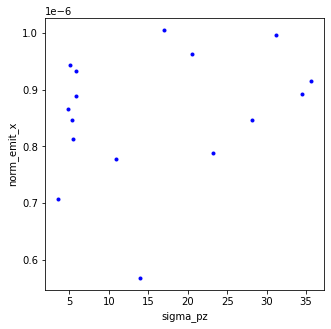

In [19]:
# Extract objectives from output
import numpy as np
key1, key2 = list(X.vocs['objectives'])

x = [o[key1] for o in X.population['outputs']]
y = [o[key2] for o in X.population['outputs']]

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

#ax.scatter(x, y, color='blue')
ax.plot(np.asarray(x)/1.0e6, np.asarray(y),'.', color='blue')
#ax.set_xlim(X_RANGE)
#ax.set_ylim(Y_RANGE)
ax.set_xlabel(key1)
ax.set_ylabel(key2)
ax.set_aspect('auto')
#ax.set_title(NAME)

## Load Archive Data from Json

In [24]:
from xopt.dataset import load_all_xopt_data

In [25]:
from glob import glob
jlist = glob('output/gen*json')
jlist

['output/gen_1.json', 'output/gen_3.json', 'output/gen_2.json']

In [26]:
DAT = load_all_xopt_data(jlist)


In [27]:
DAT

,L1_10_25_phase,L1_9_25_phase,L1_9_50_phase,L2_10_25_phase,X1_Xband_phase,L3_10_25_volt,L3_10_50_volt,X_MAX,DX,DP,...,sigma_pz,norm_emit_x,sigma_t,mean_pz,charge,ptp_t,core_norm_emit_x,core_pz,core_current,archive
0,57.318727,50.114199,34.329614,50.498838,-88.693533,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,3.544856e+06,7.069740e-07,6.598183e-14,5.666140e+09,1.342500e-10,2.803879e-13,4.192907e-07,1.998388e+06,739.242774,./output/beams/elegant_sim_d4893ec8bb030f83cdd...
1,42.439163,64.808181,37.913017,39.785961,-92.339491,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,8.059022e+06,2.195897e-06,8.184251e-14,4.902855e+09,1.375500e-10,4.274264e-13,1.673771e-06,2.169504e+06,730.704641,./output/beams/elegant_sim_f11592495dcbe010f1c...
2,58.994565,71.291324,67.039368,44.218206,-58.042640,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,5.438302e+06,8.140157e-07,4.832502e-14,5.259837e+09,1.348500e-10,2.620040e-13,5.113531e-07,3.656919e+06,952.106131,./output/beams/elegant_sim_40f38e9be23c00ce35d...
3,59.914109,57.868707,33.061208,41.670515,-86.676191,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,5.838122e+06,1.150171e-06,8.388997e-14,5.049466e+09,1.356000e-10,3.653617e-13,5.650354e-07,1.840784e+06,675.418046,./output/beams/elegant_sim_120c67792eba84fe57a...
4,51.217526,76.730006,30.941615,52.040977,-96.307934,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.456076e+07,1.030547e-06,6.282484e-14,5.765090e+09,1.458000e-10,2.945019e-13,3.564986e-07,3.270839e+06,1005.917402,./output/beams/elegant_sim_14e20b3032e677267c3...
5,54.060807,70.992182,49.530896,53.083278,-62.126977,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,1.096361e+07,7.778825e-07,2.007274e-14,5.839552e+09,1.263000e-10,9.081604e-14,5.443682e-07,7.704919e+06,2270.998341,./output/beams/elegant_sim_36c4df89af8670b4b96...
6,59.338494,70.061663,48.085432,32.892126,-81.800696,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,1.691112e+07,1.345382e-06,1.991133e-13,4.356863e+09,1.408500e-10,9.034421e-13,6.162221e-07,7.098360e+05,327.457926,./output/beams/elegant_sim_4eda0fcf9084fa3eaca...
7,39.609216,60.458641,53.707074,42.052016,-93.025989,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.056274e+07,9.632686e-07,1.482758e-13,5.084622e+09,1.417500e-10,6.590055e-13,4.972590e-07,1.394677e+06,451.152081,./output/beams/elegant_sim_bbe7cf2b0ac184a7f2b...
8,54.015553,50.005431,41.586810,55.668971,-101.910756,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.651022e+07,1.543395e-06,1.840378e-14,5.975436e+09,1.461000e-10,1.093897e-13,5.185185e-07,9.341342e+06,3098.661727,./output/beams/elegant_sim_8ed9e98b08113944544...
9,52.014854,59.424189,33.619124,44.480814,-72.498934,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,3.397676e+07,1.010663e-06,2.006511e-13,5.260867e+09,1.168500e-10,7.430191e-13,3.346395e-07,1.015406e+06,244.221453,./output/beams/elegant_sim_ca4e32d298007dfbcc1...


In [28]:
#see archive file list --> particle distributions

In [29]:
DAT['archive']

0     ./output/beams/elegant_sim_d4893ec8bb030f83cdd...
1     ./output/beams/elegant_sim_f11592495dcbe010f1c...
2     ./output/beams/elegant_sim_40f38e9be23c00ce35d...
3     ./output/beams/elegant_sim_120c67792eba84fe57a...
4     ./output/beams/elegant_sim_14e20b3032e677267c3...
5     ./output/beams/elegant_sim_36c4df89af8670b4b96...
6     ./output/beams/elegant_sim_4eda0fcf9084fa3eaca...
7     ./output/beams/elegant_sim_bbe7cf2b0ac184a7f2b...
8     ./output/beams/elegant_sim_8ed9e98b08113944544...
9     ./output/beams/elegant_sim_ca4e32d298007dfbcc1...
10    ./output/beams/elegant_sim_9c95f1844ef436ee908...
11    ./output/beams/elegant_sim_129a455025eeaf95783...
12    ./output/beams/elegant_sim_fa0e98b419c104861b1...
13    ./output/beams/elegant_sim_0442f803c67136ffdb0...
14    ./output/beams/elegant_sim_d7fe32933c5048f768b...
15    ./output/beams/elegant_sim_1a450a167251ce32bca...
16    ./output/beams/elegant_sim_2dccbc45ca38517f98b...
17    ./output/beams/elegant_sim_1b54fb7712502a3

In [30]:
last_file_idx=len(DAT)-1
DAT['archive'][last_file_idx] #look at last archive file

'./output/beams/elegant_sim_e41b4f7b82842a4994d5c52dced566fb.h5'

## Load particle distribution from an archive file

In [38]:
from pmd_beamphysics import ParticleGroup
from h5py import File
import h5py

In [39]:
with h5py.File(DAT['archive'][last_file_idx], 'r') as h5:
    print(list(h5.attrs))

['basePath', 'chargeUnitSI', 'dataType', 'numParticles', 'openPMD', 'openPMDextension', 'particlesPath', 'speciesType', 'totalCharge']


In [40]:
# This will convert to a data dict
P = ParticleGroup(DAT['archive'][last_file_idx])
P

<ParticleGroup with 891 particles at 0x2aaad5f2f880>

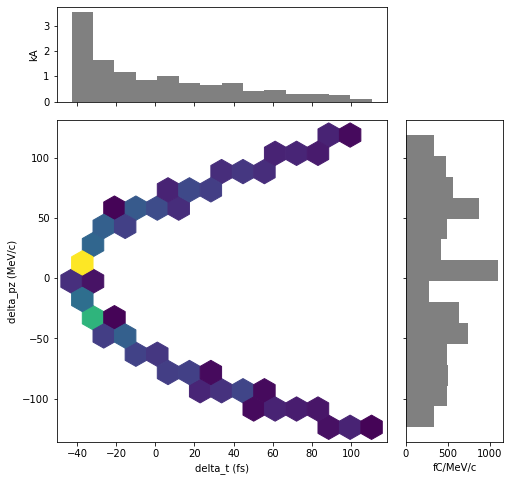

In [41]:
P.plot('delta_t', 'delta_pz', figsize=(8,8))

In [42]:
P['mean_energy'], P.units('mean_energy')

(6103503611.465705, pmd_unit('eV', 1.602176634e-19, (2, 1, -2, 0, 0, 0, 0)))

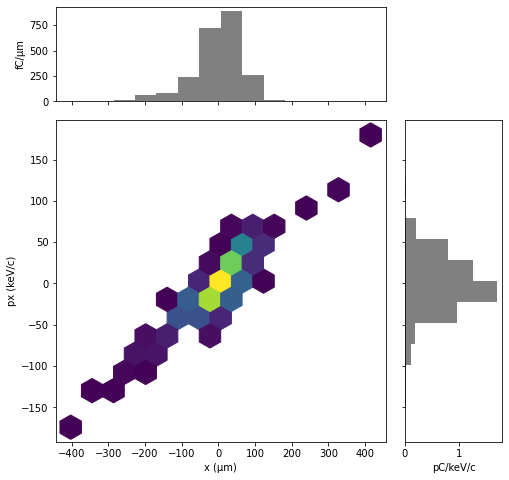

In [43]:
P.plot('x', 'px', figsize=(8,8))

In [44]:
P2=P.where(P.x < P['mean_x'])

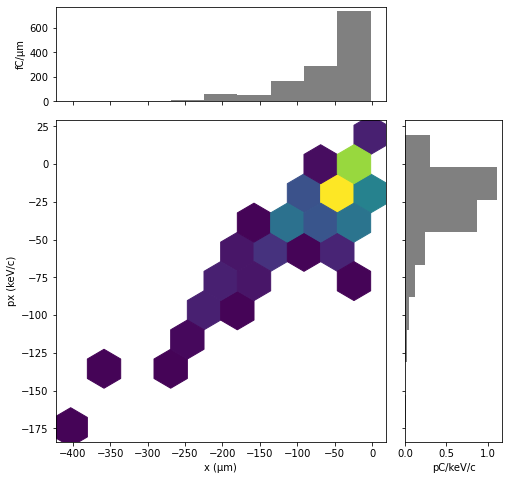

In [45]:
P2.plot('x', 'px', figsize=(8,8))

#  Load one run settings and rerun

In [31]:
import json

In [33]:
indat = json.load(open('./output/gen_1.json'))

In [34]:
indat.keys()

dict_keys(['variables', 'generation', 'vocs', 'error', 'inputs', 'outputs'])

In [35]:
indat['outputs'][0]

{'sigma_pz': 3544856.2094069053,
 'norm_emit_x': 7.069739928079219e-07,
 'sigma_t': 6.598182579451428e-14,
 'mean_pz': 5666140079.396033,
 'charge': 1.3425e-10,
 'ptp_t': 2.8038794634070545e-13,
 'core_norm_emit_x': 4.192907207754899e-07,
 'core_pz': 1998388.3963409327,
 'core_current': 739.2427738891508,
 'archive': './output/beams/elegant_sim_d4893ec8bb030f83cdd47436af58aef0.h5'}

In [36]:
SETTINGS = indat['inputs'][0]

In [37]:
X.evaluate(SETTINGS)

{'sigma_pz': 3544856.2094069053,
 'norm_emit_x': 7.069739928079219e-07,
 'sigma_t': 6.598182579451428e-14,
 'mean_pz': 5666140079.396033,
 'charge': 1.3425e-10,
 'ptp_t': 2.8038794634070545e-13,
 'core_norm_emit_x': 4.192907207754899e-07,
 'core_pz': 1998388.3963409327,
 'core_current': 739.2427738891508,
 'archive': './output/beams/elegant_sim_d4893ec8bb030f83cdd47436af58aef0.h5'}